<a href="https://colab.research.google.com/github/ioskn/mldl_htwg/blob/master/eda/Explorative%20Analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Beispiel für eine explorative Datenanalyse: Erdbeben der letzten 7 Tage (US Geological Survey)
==============================================================================================


## Einbinden von packages
Import zweier Standardpakete für die Datenanalyse: Numpy für mehrdimensionale Arrays, Pandas für Datenanalyse in Tabellen.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

np.__version__, pd.__version__

('1.23.4', '1.5.0')

## Einlesen der Data

Idealerweise sind die noteboks standalone. Im ersten Schritt werden die Daten eingelesen.

#### Direkter Download
Direkter Download vom USGS, Abruf des Downloaddatums, automatischer Import in Pandas-Dataframe. 

In [5]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B',
        'LSTAT','TGT']
eData = pd.read_csv(url, sep=' ', skipinitialspace=True, header=None, names=cols, 
                     index_col=False)
dateDownloaded = !date #Calling Linux
dateDownloaded

['Mon Oct 17 08:52:59 UTC 2022']

#### Caching

Bei grösseren Datein empfiehlt sich ein cacheing der Daten. 

In [6]:
import os
if not os.path.isfile('housing.data'):
    !pip install wget #Installation of wget
    import wget
    print("Downloading file...\n")
    wget.download('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', 'housing.data')
else:
    print("File exists\n")
!ls -11

  Using cached wget-3.2-py3-none-any.whl

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip

01-explorative-analyse.ipynb
_exercise-sheet.ipynb
housing.data


### Darstellung als Pandas-DataFrame
-----------------------------------

Darstellung des Datensatzes als Datensatzes als Pandas-Dataframe (Tabelle der ersten und letzten 30 Einträge, Anzahl Reihen und Spalten). Konvention: Variablen sind die Spalten, einzelne Messungen die Zeilen.

In [8]:
eData

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT   TGT  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

Kürzere Darstellung mit head(): nur die ersten 5 Einträge des Tabellenkopfes

In [9]:
eData.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT   TGT  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

Anzahl der Reihen und Spalten mit Numpy shape().

In [10]:
np.shape(eData)

(506, 14)

Anzeige der einzelnen Spaltennamen mit Attribut DataFrame.columns

In [11]:
eData.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'TGT'],
      dtype='object')

Datentyp der einzelnen Variablen mit Attribut DataFrame.dtypes

In [12]:
eData.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
TGT        float64
dtype: object

2. Aufbereitung des Datensatzes
-------------------------------

Überprüfen, ob Tabelle NaN enthält, mit DataFrame.isnull().any()

In [13]:
eData.isna().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
TGT        False
dtype: bool

Entfernung aller Zeilen bzw. Messungen mit NaNs durch DataFrame.dropna()

In [14]:
eData = eData.dropna()
eData.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT   TGT  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [15]:
eData.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
TGT        False
dtype: bool

Überprüfen, ob Zeilen bzw. Messungen doppelt vorkommen, mit DataFrame.duplicated()

In [16]:
eData.duplicated().any()

False

Es kommen also keine Duplikate vor. Bei Bedarf mit *DataFrame.drop_duplicates()* entfernen.

3. Explorative Statistiken
--------------------------

Statistische Beschreibung der numerischen Variablen mit Dataframe.describe() (count: Anzahl Messungen, mean: Mittelwert, std: Standardabweichung, min: Minimum, 25%: 25-Perzentil, ...)

In [15]:
eData.describe()

Lat         Lon   Magnitude       Depth         NST
count  911.000000  911.000000  911.000000  911.000000  911.000000
mean    39.535118 -102.933544    2.103513   26.873985   33.315038
std     18.895694   79.619962    1.184900   53.237200   44.279241
min    -58.019200 -179.667800    1.000000    0.000000    3.000000
25%     34.016250 -147.437600    1.300000    4.300000   13.000000
50%     38.430700 -120.776500    1.700000    8.800000   20.000000
75%     53.213450 -116.229850    2.400000   27.900000   39.000000
max     72.814800  179.996500    6.500000  623.700000  440.000000

Streumatrix für alle numerischen Variablen mit Pandas *scattermatrix()*:

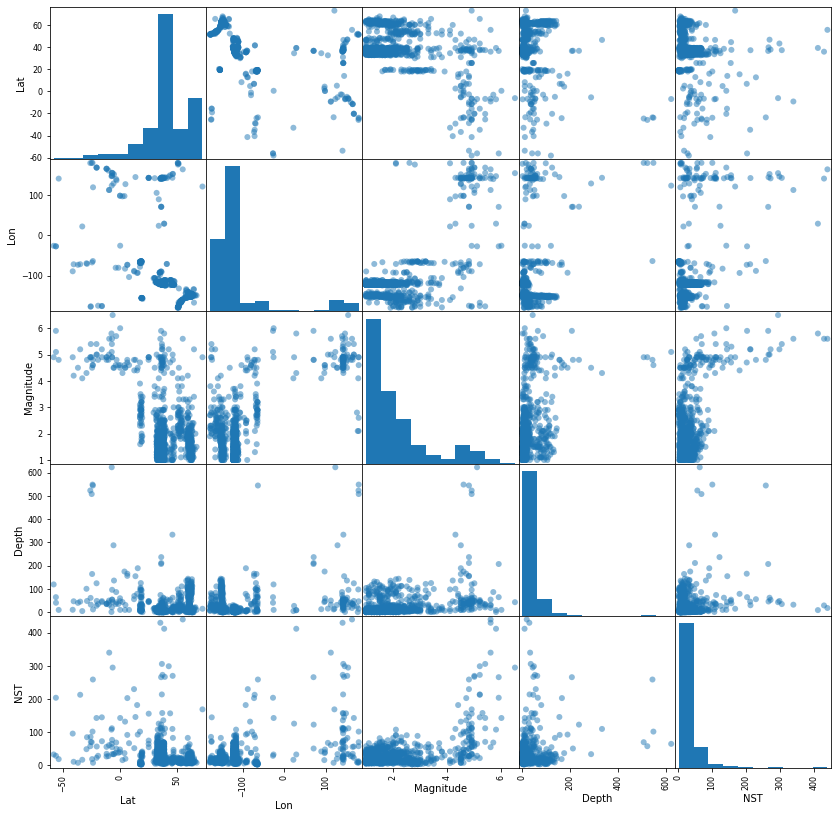

In [16]:
pd.plotting.scatter_matrix(eData, figsize=(14,14), marker='o');

4. Analyse von Untermengen
--------------------------

Zugriff auf die Variable 'Lat' (latitude):

In [17]:
eData['Lat']

0      33.9665
1      65.3689
2      58.1643
3      33.1555
4      36.7657
        ...   
906    32.6497
907    44.7355
908    18.3500
909    44.7340
910    67.6223
Name: Lat, Length: 911, dtype: float64

Welche Erdbeben fanden oberhalb einer geographischen Breite von 40 Grad statt?

In [18]:
eData['Lat'] > 40.0

0      False
1       True
2       True
3      False
4      False
       ...  
906    False
907     True
908    False
909     True
910     True
Name: Lat, Length: 911, dtype: bool

Gab es überhaupt Erdbeben oberhalb 50 Grad Breite?

In [19]:
(eData['Lat'] > 40.0).any()

True

Gab es also. Haben alle verzeichneten Erdbeben eine Breite größer als 18 Grad?

In [20]:
(eData['Lat'] > 18.0).all()

False

Es sind also auch Erdbeben unterhalb von 18 Grad verzeichnet.

Alle unterschiedlichen Werte der kategorischen Variable 'Version' mit Dataframe['Variablenname'].*unique()*

In [21]:
eData['Version'].unique()

array(['0', '2', '7', '1', '5', '8', '3', '6', '4', '9', 'B', 'C', 'A',
       'E', 'F', 'a', 'H'], dtype=object)

Häufigkeit der verschiedenen Kategorien in 'Version' mit Dataframe['Variablenname'].*value_counts()*:

In [22]:
eData['Version'].value_counts()

2    394
3    134
7    103
0     76
1     72
4     40
6     26
5     23
8     16
A     11
9      8
B      2
a      2
C      1
H      1
F      1
E      1
Name: Version, dtype: int64

Häufigkeit von Wertepaaren der beiden kategorischen Variablen 'Version' und 'Src' mit Pandas *crosstab()*:

In [23]:
pd.crosstab(eData['Src'], eData['Version'])

Version   0   1    2   3   4   5   6   7   8  9  A  B  C  E  F  H  a
Src                                                                 
ak        0  32  170  52   3   0   0   0   0  0  0  0  0  0  0  0  0
at        0   1    0   0   0   0   0   0   0  0  0  0  0  0  0  0  0
ci       28   0  102  19  10   2   2   1   0  0  0  0  0  0  0  0  0
hv        0  12    0   0   0   0   0   0   0  0  0  0  0  0  0  0  0
mb        0   1    3   0   0   0   0   0   0  0  0  0  0  0  0  0  0
nc       20   2  100  59  17   2   3   0   0  0  1  0  0  0  0  0  0
ne        0   0    0   0   0   0   0   0   0  0  0  0  0  0  0  0  2
nm        0   0    0   0   0   0   0   0   0  0  7  1  0  0  0  0  0
nn        0   0    0   0   0   0   0  78   0  0  0  0  0  0  0  0  0
pr       27   0    1   0   0   0   0   0   0  0  0  0  0  0  0  0  0
us        0   3    1   4  10  19  21  24  16  8  3  1  1  1  1  1  0
uu        0   0   17   0   0   0   0   0   0  0  0  0  0  0  0  0  0
uw        1  21    0   0   0   0   0   0   0  0  0  0  0  0  0  0  0

Darstellung der Häufigkeitsverteilung der Erdbebenstärken für die verschiedenen Quellen mit einer Kastengraphik durch Pandas *boxplot()*:

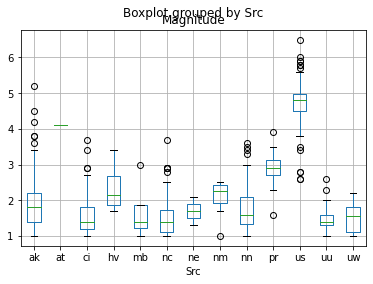

In [24]:
pd.DataFrame.boxplot(eData, column='Magnitude', by='Src');